# TASK 2

In [1]:
# 1. Primary Key Identification
#  Before merging two datasets, we must determine which column (or combination of columns) uniquely identifies each row—this becomes our primary key. For example, if the two sheets each contain a column named ID (or perhaps Customer_ID, Record_ID, etc.) that is both unique and present in every row, it is a strong candidate for the primary key.
#  Justification and Challenges:
  # Uniqueness: The selected key must uniquely identify each record in both sheets. If the key has duplicates or missing values, the integration may yield unexpected duplications or data loss.
  # Data Consistency: Even if two datasets have a field like ID, variations in data type (e.g., one dataset uses numeric values while the other stores them as strings) or extraneous whitespace can cause mismatches during merging.
  # Missing Data: In some cases, records might have null or missing key values, making the key less reliable for joining.
   #Composite Keys: Sometimes no single column is unique on its own, so a combination of columns (for example, FirstName + LastName + DOB) might be necessary. However, composite keys require careful handling as any inconsistency across multiple columns can break the join.

# In most practical cases, if both sheets include a consistent ID column that passes uniqueness checks, it is the ideal primary key.



In [3]:
# 2. Data Cleaning
import pandas as pd
import numpy as np

In [5]:
# Load both sheets;
sheets = pd.read_excel('Data for Task 2.xlsx', sheet_name=None)


In [7]:
df1 = sheets['Work Order Data']
df2 = sheets['Repair Data']

In [9]:
df1.head(3)

,Primary Key,Order No,Segment Number,Order Date,Manufacturer,Model,Product Category,Model Year,Serial Number,Meter 1 Reading,Complaint,Cause,Correction,Failure Condition - Failure Component,Fix Condition - Fix Component
0,SO0005588-1,SO0005588,1,2022-04-30,PASEIH,6780,APPL,0,YFT042399,2531.0999,"No cab heat, temp gauge dont get to operating ...",NaN,"Als ich das Gerät in die Werkstatt fuhr, stieg...","No Heat - Cab, Not Achieving - Gauge",No Component Mentioned - Added
1,SO0005907-1,SO0005907,1,2022-04-30,PASEIH,6780,APPL,0,YFT042399,2531.0999,"No cab heat, temp gauge dont get to operating ...",NaN,"Als ich das Gerät in die Werkstatt fuhr, stieg...","No Heat - Cab, Not Achieving - Gauge",No Component Mentioned - Added
2,SO0006100-1,SO0006100,1,2022-04-30,PASEIH,6780,APPL,0,YFT042399,2531.0999,"No cab heat, temp gauge dont get to operating ...",NaN,"Als ich das Gerät in die Werkstatt fuhr, stieg...",Not Charging - Alternator,No Component Mentioned - No Component Mentioned


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Primary Key                            500 non-null    object        
 1   Order No                               500 non-null    object        
 2   Segment Number                         500 non-null    int64         
 3   Order Date                             500 non-null    datetime64[ns]
 4   Manufacturer                           500 non-null    object        
 5   Model                                  500 non-null    object        
 6   Product Category                       500 non-null    object        
 7   Model Year                             500 non-null    int64         
 8   Serial Number                          500 non-null    object        
 9   Meter 1 Reading                        500 non-null    float64   

In [11]:
#df2.head()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Primary Key        500 non-null    object 
 1   Order No           500 non-null    object 
 2   Segment Number     500 non-null    int64  
 3   Coverage           81 non-null     object 
 4   Qty                500 non-null    int64  
 5   Part Manufacturer  500 non-null    object 
 6   Part Number        500 non-null    object 
 7   Part Description   500 non-null    object 
 8   Revenue            500 non-null    float64
 9   Cost               500 non-null    object 
 10  Invoice Date       500 non-null    int64  
 11  Actual Hours       482 non-null    float64
 12  Segment Total $    500 non-null    object 
dtypes: float64(2), int64(3), object(8)
memory usage: 50.9+ KB


In [13]:
# Check for duplicates in Primary Key
print("Duplicates in Work Order Data Primary Key:", df1['Primary Key'].duplicated().sum())
print("Duplicates in Repair Data Primary Key:", df2['Primary Key'].duplicated().sum())


Duplicates in Work Order Data Primary Key: 0
Duplicates in Repair Data Primary Key: 5


In [15]:
##Handling Missing Values and Duplicates:
##Remove duplicate rows, and decide on a strategy for missing values (whether to drop or impute based on context).# Remove duplicates
df1.drop_duplicates(inplace=True)
df2.drop_duplicates(inplace=True)

In [17]:
df1.dropna(inplace=True)
df2.dropna(inplace=True)

In [19]:
# Format Correction
df1['Order Date'] = pd.to_datetime(df1['Order Date'], errors='coerce')
df2['Revenue'] = df2['Revenue'].astype(str).str.replace('$', '', regex=False).astype(float)
df2['Cost'] = df2['Cost'].astype(str).str.replace('$', '', regex=False).astype(float)


In [21]:
#Language Translation:
# some text data appears in different languages, we can use a library such as googletrans to translate those fields into a single language.
!pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.3 MB ? eta -:--:--
   ------------------------ --------------- 0.8/1.3 MB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 2.2 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17457 sha256=0930ced6ae1c831b2f8b5595bfe630a233548616111762b7399089323d753866
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\95\0f\04\b17a72024b56a60e499ce1a6313d283ed5ba332407155bee03
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Successfully uninstalled h11-0.14.0
  Attempting uninstall: chardet
    Found existing installation: chardet 4.0.0
    Uninstalling chardet-4.0.0:
      Successfully uninstalled c

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterlab 4.2.5 requires httpx>=0.25.0, but you have httpx 0.13.3 which is incompatible.


In [23]:

from googletrans import Translator

In [25]:
translator = Translator()
df1['Correction'] = df1['Correction'].apply(lambda x: translator.translate(x, dest='en').text)

In [26]:
# Cleaning Summary
print("\nData cleaning complete.")
print("Null values after cleaning:")
print(df1.isnull().sum())
print(df2.isnull().sum())



Data cleaning complete.
Null values after cleaning:
Primary Key                              0
Order No                                 0
Segment Number                           0
Order Date                               0
Manufacturer                             0
Model                                    0
Product Category                         0
Model Year                               0
Serial Number                            0
Meter 1 Reading                          0
Complaint                                0
Cause                                    0
Correction                               0
Failure Condition - Failure Component    0
Fix Condition - Fix Component            0
dtype: int64
Primary Key          0
Order No             0
Segment Number       0
Coverage             0
Qty                  0
Part Manufacturer    0
Part Number          0
Part Description     0
Revenue              0
Cost                 0
Invoice Date         0
Actual Hours         0
Segment Total

In [27]:
#3. Data Integration
#a. Merging the Datasets:
##With a unique primary key (e.g., ID), you can merge the datasets using an appropriate join. For example, using an inner join ensures that only records that appear in both sheets are retained:
# Merge on the primary key using an inner join
merged_df = pd.merge(df1, df2, on='Primary Key', how='inner')




In [28]:
# b.  Choice of Join and Its Implications:
#-Inner Join (Used Above):- Justification: This choice retains only rows with matching primary key values in both datasets, ensuring the integrated dataset has complete information from both sources.
#- Implications: Any record present in only one sheet will be dropped, which might be desired if the analysis requires validated, complete data.

#- Left Join:- Implications: Preserves all records from the left dataset (e.g., df1) and attaches matching data from the right (df2). Records in df1 without a corresponding key in df2 will have missing values for the right-side columns. This may be useful if df1 is considered more comprehensive or if retaining all original data is critical.

#- Right Join and Outer Join:- Right Join: Works like a left join but prioritizes df2.
#- Outer Join: Retains all records across both datasets. Unmatched entries will have missing values on the side where data is absent. This type can be useful if you want a complete picture of all data points, but it may introduce a significant number of missing values that could complicate later analysis.


#For a consistent, quality dataset where both sources are critical, an inner join avoids partial records that could skew insights.


#               TASK 3

In [33]:
merged_df.head(2)

,Primary Key,Order No_x,Segment Number_x,Order Date,Manufacturer,Model,Product Category,Model Year,Serial Number,Meter 1 Reading,...,Coverage,Qty,Part Manufacturer,Part Number,Part Description,Revenue,Cost,Invoice Date,Actual Hours,Segment Total $
0,SO0058727-12,SO0058727,12,2023-06-19,PASEIH,9861,SPRAYS,2023,YPT056934,0.0,...,5 hours accounted for as generic codes. Should...,0,PK SYSTEMS,244441047 AGRO,1/2 COUPLER,0.0,0.0,45136,3.8999,729.3$
1,SO0058727-12,SO0058727,12,2023-06-19,PASEIH,9861,SPRAYS,2023,YPT056934,0.0,...,5 hours accounted for as generic codes. Should...,0,PK SYSTEMS,4452558 PASTEL,1/2 COUPLER,0.0,0.0,45136,3.8999,729.3$


In [35]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 27 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Primary Key                            45 non-null     object        
 1   Order No_x                             45 non-null     object        
 2   Segment Number_x                       45 non-null     int64         
 3   Order Date                             45 non-null     datetime64[ns]
 4   Manufacturer                           45 non-null     object        
 5   Model                                  45 non-null     object        
 6   Product Category                       45 non-null     object        
 7   Model Year                             45 non-null     int64         
 8   Serial Number                          45 non-null     object        
 9   Meter 1 Reading                        45 non-null     float64     

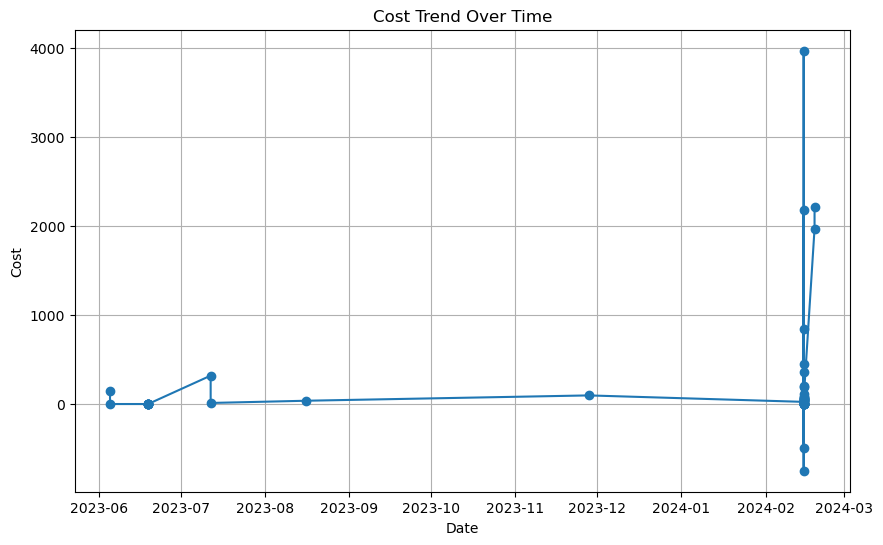

In [37]:
# 1. Trend Analysis
### a. Visalisation 1.


import pandas as pd
import matplotlib.pyplot as plt

# Load the merged dataset (assumed previously cleaned and merged)


# If a 'date' column exists, convert it to datetime format and sort the dataset
if 'Order Date' in merged_df.columns:
    merged_df['Order Date'] = pd.to_datetime(merged_df['Order Date'])
    merged_df.sort_values('Order Date', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(merged_df['Order Date'], merged_df['Cost'], marker='o', linestyle='-')
plt.title("Cost Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Cost")
plt.grid(True)
plt.show()

### Interpretation:
This line chart helps reveal whether costs are increasing, decreasing, or showing seasonal variation—important for budgeting and resource planning.


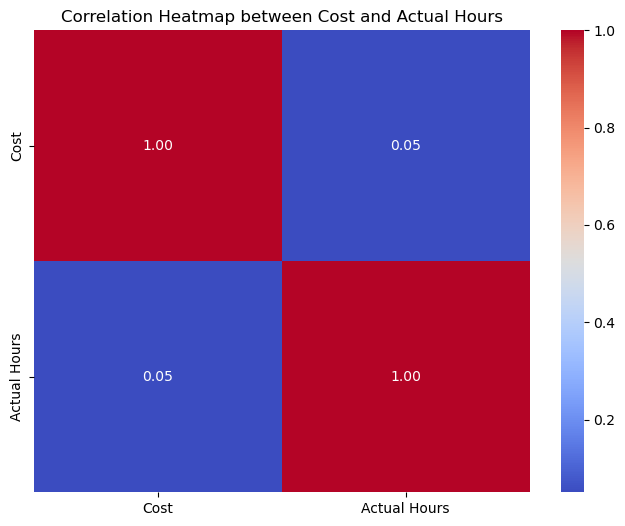

In [39]:
# Visualisation 2. Heatmap for Correlation Analysis

import seaborn as sns

# Select numeric columns of interest for correlation
numeric_cols = ['Cost', 'Actual Hours']
corr_matrix = merged_df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap between Cost and Actual Hours")
plt.show()

### Interpretation:
A high positive correlation suggests that increased repair hours are strongly associated with higher costs. This insight may point stakeholders to focus on efficiency improvements in repair processes


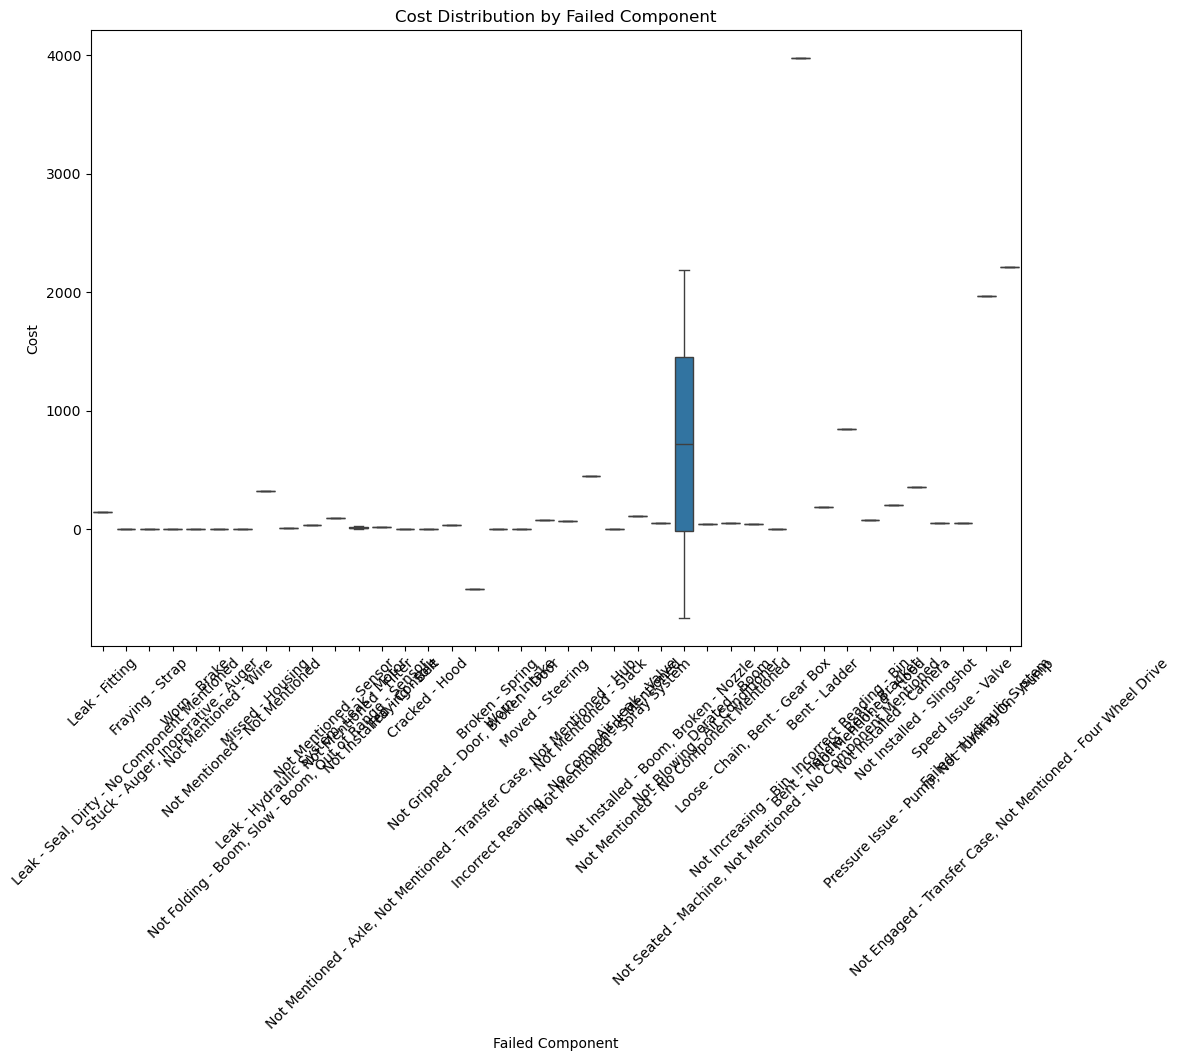

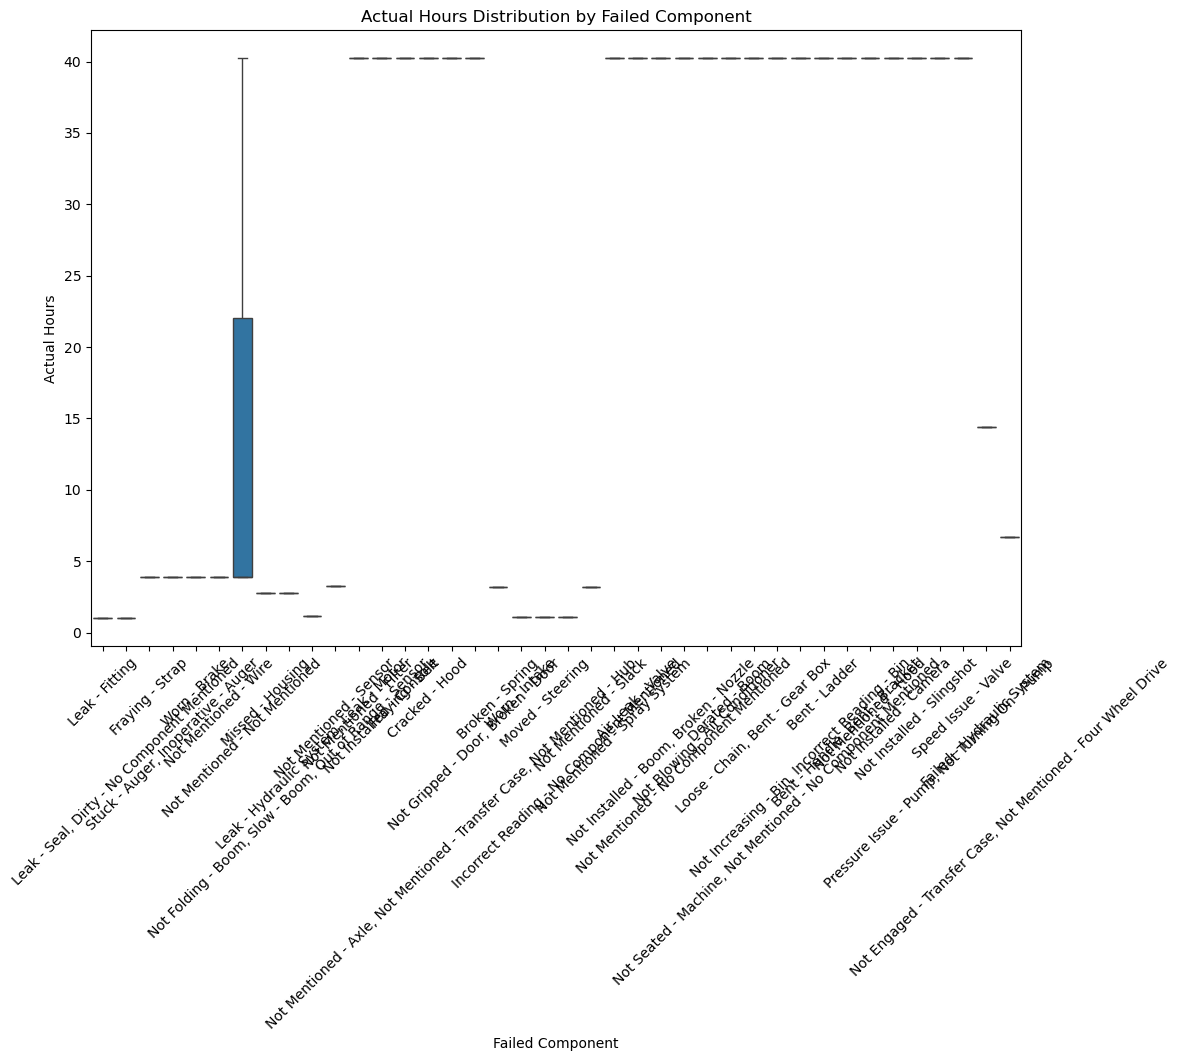

In [41]:
#Visualization 3: Boxplots to Analyze Failed Components
plt.figure(figsize=(12, 8))
sns.boxplot(x='Failure Condition - Failure Component', y='Cost', data=merged_df)
plt.title("Cost Distribution by Failed Component")
plt.xlabel("Failed Component")
plt.ylabel("Cost")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Failure Condition - Failure Component', y='Actual Hours', data=merged_df)
plt.title("Actual Hours Distribution by Failed Component")
plt.xlabel("Failed Component")
plt.ylabel("Actual Hours")
plt.xticks(rotation=45)
plt.show()



###Interpretation:
These boxplots display the spread and central tendency of cost and actual hours per component. Components that show higher medians and wider variability may warrant further investigation as potential root causes of escalated maintenance expenses.


In [43]:
## 2. Root Cause Identificatio

#a. Top Failure Conditions
print("\n--- Failure Condition Frequency ---")
print("\n")
print(merged_df['Failure Condition - Failure Component'].value_counts().head(5))

# Failure Condition vs. Part Description
failure_summary = merged_df.groupby(['Failure Condition - Failure Component', 'Part Description']).size().reset_index(name='Count')
root_causes = failure_summary.sort_values(by='Count', ascending=False).head(10)
print("\n--- Top 10 Failure Condition & Component Combinations ---")
print(root_causes)


--- Failure Condition Frequency ---


Failure Condition - Failure Component
Not Mentioned - Not Mentioned             3
Fraying - Strap                           2
Not Mentioned - No Component Mentioned    2
Not Mentioned - Filter                    2
Leak - Fitting                            1
Name: count, dtype: int64

--- Top 10 Failure Condition & Component Combinations ---
                Failure Condition - Failure Component        Part Description  \
8                                     Fraying - Strap             1/2 COUPLER   
0                                    Air Leak - Valve            FILTER  FUEL   
33                      Not Mentioned - Not Mentioned                 REDUCER   
25  Not Mentioned - Axle, Not Mentioned - Transfer...     FITTING,BRASS ELBOW   
26                             Not Mentioned - Filter            FILTER  FUEL   
27                             Not Mentioned - Filter          O-RING,SPECIAL   
28                               Not Mentioned - Ho

In [47]:
# Save updated analysis summary if needed
merged_df.to_csv('axionray_final_analysis_data.csv', index=False)

print("\nEDA Complete. Visualizations generated and root cause analysis summary ready.")



EDA Complete. Visualizations generated and root cause analysis summary ready.


In [49]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.
